In [ ]:
'''
#=========== Exercise Set 1 ===========#

1. The total net force on the dipole is 0.

2. The magnitude of the net torque on the dipole in terms of q, d, and E:
	u = Fdsinθ
	  = qEdsinθ

3. Torque as a vector in terms of the vectors p and e:
	u = qEdsinθ
	  = (qd)Esinθ
	  = ||P||||E||sinθ
	  = P x E

4. For:
	θ = 0° the dipole is in stable equilibrium
	0 < θ < 90° the dipole is in unstable equilibrium
	θ = 90° the dipole undergoes maximum torque.

#=========== Exercise Set 2 ===========#

1. Show for small initial displacement θ, the electric dipole undergoes simple harmonic motion.
	If an electric dipole is in stable equilibrium, it is parallel with the electric field (θ = 0°). If 
	affected by an external force (e.g. pushed up), there is a change in displacement, thus changing θ
	(angle between electric field and dipole). If small, the electric dipole will oscillate back and forth
	between amplitudes and it's initial position in simple harmonic motion.

	For harmonic motion: F = -Ax
	
		I = 2mr^2
		  = 2m(1/2 * d)^2
		  = 1/2 * md^2

	Using T = Ia:
		u = -qEdsinθ = Ia
		qEdsinθ = 1/2 * md^2 * a
	With our assumption of small initial displacement θ, sinθ  ~= θ 
		a = -(2qE/md)θ
		-w^2 * θ = -(2qE/md)θ
	
	>> Thus, the angular frequency of oscillations is w = sqrt(2qE/md)

=======================================
'''

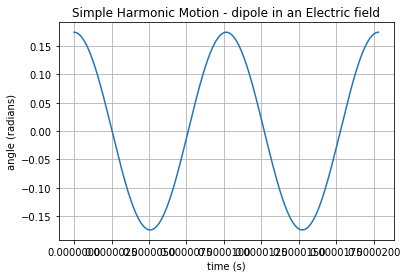

In [2]:
import numpy as np
import matplotlib.pyplot as plt

theta0=(10.0/180)*np.pi  #initial displacement in radians

q = 1.6 * (10**-19)    #Charge on dipole in Coulombs
d = 0.05               #distance separating the charges (m)
m = 1.67 * (10**-27)   #mass of a single charge (kg)
E = 100                #magnitude of the electric field


############################################################
########        EDIT BELOW WITH YOUR VALUE       ###########
########       THIS IS THE ANGULAR FREQUENCY     ###########

omega = np.sqrt((2*q*E)/(m*d))

############################################################

############################################################
########     Determine the Period of the motion     ########
########      in terms of the angular frequency     ########

T = (2*np.pi)/(omega)

############################################################

t=np.linspace(0,2*T,2000)  #time interval from t = 0 to t = 2T
theta = theta0*np.cos(omega*t) #solution for Simple harmonic motion

############################################################
########   The following code plots the data         #######

plt.plot(t,theta)
plt.title("Simple Harmonic Motion - dipole in an Electric field")
plt.xlabel("time (s)")
plt.ylabel("angle (radians)")
plt.grid()
plt.show()
###########################################################


In [ ]:
'''
#=========== Exercise Set 3 ===========#

1. a) After t = 7.65 seconds, the two solutions differ by more than 0.1 rads.

'''

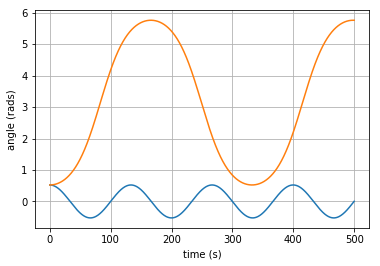

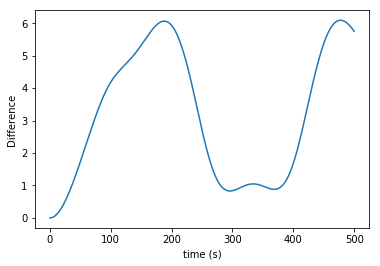

('after t =', 7.650153003060062, 'the two solutions differ by more than .01 rads')


In [3]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

############################################################
################ Start of parameters  ###################
theta_degrees = 30.0  #intial angle of displacement (degres)
Tmax = 500.0           #upper bound for time (s)
q = 1.0e-19              #Charge on dipole in Coulombs
d = 3.0e-9             #distance separating the charges (m)
m = 3.0e-5              #mass of a single charge (kg)
E = 1000             #magnitude of the electric field

N = 50000              #number of time intervals
error = 0.05


############################################################
########        EDIT BELOW WITH YOUR VALUE       ###########
########       THIS IS THE ANGULAR FREQUENCY     ###########
omega = np.sqrt((2.0*q*E/(d*m)))

############################################################

################  End of parameters      ###################
############################################################

#Set the times to evaluate 
t = np.linspace(0,Tmax,N)

#convert initial angle to radians
theta_rads = theta_degrees * np.pi / 180.0

##############################
# compute approximate theta values on the time intervals
Approx_Solution = theta_rads*np.cos(omega*np.array(t))

##############################
# Set the intial condition [initial angle, initial velocity]
x0 = [theta_rads, 0.0]

# TORQUE FUNCTION
def torque (y, t, q, d, m ,E):
    b = (-q * E) / (m * d)
    theta, omega = y
    dydt = [omega, -b*np.sin(theta)]
    return dydt
    
##############################
# numerically solve the real solution using odeint
sol2 = odeint(torque,x0,t,args=(q,d,m,E))

#############################
# Plot the two solutions
plt.plot(t,theta_rads*np.cos(omega*np.array(t)))
plt.plot(t,sol2[:,0])
plt.grid()
plt.xlabel("time (s)")
plt.ylabel("angle (rads)")
plt.show()


############################
# compute the difference between approx and actual on intervals
diff = [np.abs((a1-b1)) for a1,b1 in zip(Approx_Solution,sol2[:,0])]

#########################################
# Plot the difference vs time
plt.plot(t,diff)
plt.xlabel("time (s)")
plt.ylabel("Difference")
plt.show()

#########################################
#  Find when the two differ by .01 radians
flag = True
for i in range(len(t)-1):
    if abs(diff[i] > error):
        print("after t =", t[i],"the two solutions differ by more than .01 rads")
        flag = False
        break
if flag:
    print("solution always within",error," rads")

In [ ]:
'''
#=========== Exercise Set 3 cont'd ===========#

2. ______E(N/C)_____|_______t(s)______
		1000		|		7.65
		2000		|		5.41
		3000		|		4.42
		4000		|		3.83
		5000		|		3.43
					|

	The time it takes for solutions to differ by .01 rads decreases as the magnitude
	of the electric field is increased, and vice versa.

3. The differences are the largest when one solution is at it's maximum, while the other 
	is at it's minimum, as per graphed. This is due to the discrepancy in oscillation amplitude 
	modelled by the two solutions respectively.
=======================================
'''